In [9]:
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import normalize
import numpy as np
from library.supervisedLearning.linear_regression import LinearRegression

In [6]:
#data load and visualization
boston = load_boston() 
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names 
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
X = boston.data
y = boston.target
# adding bias term
X = np.insert(X,0,1,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

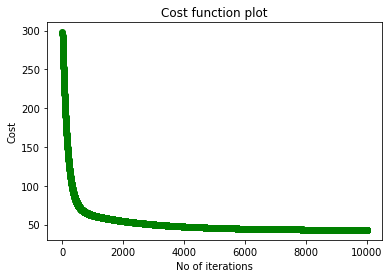

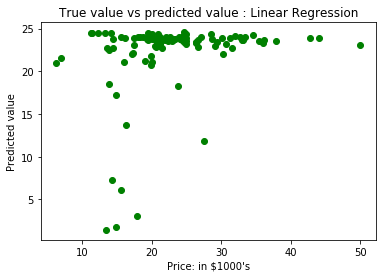

Mean Square Error :  60.7989803043107


In [10]:
num_iterations = 10000
model = LinearRegression(alpha=.00000001, iterations=num_iterations)
cost_hist = model.fit_lin_reg(X_train, y_train)

# view cost function to make sure gradient descent works correctly with these parameters
plt.scatter(range(num_iterations), cost_hist, c = 'green') 
plt.xlabel("No of iterations") 
plt.ylabel("Cost") 
plt.title("Cost function plot") 
plt.show() 

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 

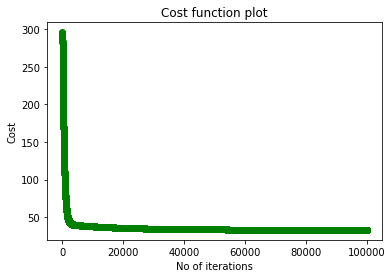

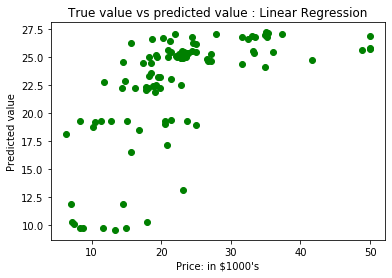

Mean Square Error :  53.83571858223394


In [11]:
# normalizing features allows model to converge with larger learning rate
X = boston.data
y = boston.target
X = normalize(X)
# adding bias term
X = np.insert(X,0,1,axis=1)
X_train, X_test, y_train, y_test = train_test_split(normalize(X), y, test_size =0.2)

num_iterations = 100000
model = LinearRegression(alpha=.001, iterations=num_iterations)
cost_hist = model.fit_lin_reg(X_train, y_train)
plt.scatter(range(num_iterations), cost_hist, c = 'green') 
plt.xlabel("No of iterations") 
plt.ylabel("Cost") 
plt.title("Cost function plot") 
plt.show() 

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 